In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def week_number(date):
    '''
        Parses the date and returns an integer depending on which week it is.
        Input:
            date: is a string given in the following format: 14-08-22
        Returns:
            week: integer, number of week it is based on the date where April 24-30 is week zero based on Jan 2-8 being week 16.
        '''
    
    date = date.split("-")
    day_number = 0
    week = 0
    
    for i in range(len(date)):
        
        if i == 0: # Day
            day_number += int(date[i])
            
        elif i==2: # Year
            if int(date[i]) == 22: #Needs to add 52 weeks
                week = 17+52-round((day_number+1)/7) #The +1 is because of rounding
            
            elif int(date[i]) == 21: #Needs to add 52 weeks
                week = 17+52*2-round((day_number+1)/7) #The +1 is because of rounding
                
            else: #Needs to subtract
                week = 17-round((day_number+2)/7) #The +2 is because of rounding
            
        else: # Month
            # Needs to add all the previous months
            day_number += month_days(int(date[i]))
            
    return week
            
def month_days(month):
    '''
        Input:
            month: is an integer value
        Returns:
            integer, number of days until that month
    '''
    days = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    return days[month-1]

In [24]:
def speed(dist, time):
    '''
    Obtains the speed based on distance and time from a single event.
    Input: distance and time
    Return: speed
    '''
    speed_km_h = 0
    convert_to_hours = time/60
    speed_km_h = dist / convert_to_hours
    
    return np.round(speed_km_h,1) # uncertainty of +-0.3 km/h


def specs_per_recording(data):
    ''' Input: data opened by pd.read_csv
        Returns: 4 vectors, date, distance, time and speed per recording
    '''
    date = []
    distance_km = np.zeros(len(data))
    time_min = np.zeros(len(data), dtype=int)
    speed_km_h = np.zeros(len(data))
    
    for i in range(len(data)):
        date.append(data["Date"][i])
        distance_km[i] = data["Distance(Km)"][i]
        time_min[i] = data["Time(min)"][i]
        speed_km_h[i] = speed(distance_km[i], time_min[i])
        
    return date, distance_km, time_min, speed_km_h

In [25]:
data = pd.read_csv('recordings.txt')
print(data)

       Date  Distance(Km)  Time(min)
0  16-07-22          16.1         51
1  02-08-22          10.6         34
2  06-08-22          18.5         58
3  12-08-22           5.7         18
4  13-08-22           8.2         31
5  14-08-22          35.6        108


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6 non-null      object 
 1   Distance(Km)  6 non-null      float64
 2   Time(min)     6 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [27]:
date, distance_km, time_min, speed_km_h = specs_per_recording(data)
date, distance_km, time_min, speed_km_h

(['16-07-22', '02-08-22', '06-08-22', '12-08-22', '13-08-22', '14-08-22'],
 array([16.1, 10.6, 18.5,  5.7,  8.2, 35.6]),
 array([ 51,  34,  58,  18,  31, 108]),
 array([18.9, 18.7, 19.1, 19. , 15.9, 19.8]))

In [28]:
activity_weeks = []

for i in range(len(date)):
    
    current_week = week_number(date[i]) 
    print(current_week)
    try:
        if current_week != activity_weeks[-1]:
            activity_weeks.append(current_week)
            
    except IndexError as e:
        activity_weeks.append(current_week)
        
print(activity_weeks)

41
38
38
37
37
37
[41, 38, 37]


In [29]:
def stats(week, data):
    '''
    In a given week, obtains the total amount of distance, time and average speed.
    Inputs:
        week is an integer value between 0 and 52
        data: is the data we obtain from the pandas function
    Returns:
        3 vectors for each week: total_km, total_time, avg_speed
    '''
    
    banner = True
    total_km = 0
    total_time = 0
    avg_speed = []
    date, distance_km, time_min, speed_km_h = specs_per_recording(data)
    
    for i in range(len(data)):
        
        current_week = week_number(date[i])
        
        if week == current_week:
            total_km += distance_km[i]
            total_time += time_min[i]
            avg_speed.append(speed(distance_km[i], time_min[i]))
            banner = False
        
        elif week != current_week and banner == False:
            break
            
    return total_km, total_time, np.sum(avg_speed)/len(avg_speed)

In [30]:
print(data)

       Date  Distance(Km)  Time(min)
0  16-07-22          16.1         51
1  02-08-22          10.6         34
2  06-08-22          18.5         58
3  12-08-22           5.7         18
4  13-08-22           8.2         31
5  14-08-22          35.6        108


In [31]:
def print_stats(week, data):
    total_km, total_time, avg_speed = stats(week, data)
    
    print("Stats for week " + str(week))
    print("Distance: " + str(total_km) + " km")
    print("Time: " + str(total_time) + " min")
    print("Average speed: " + str(avg_speed) + " km/h")
    
    return None

In [32]:
for week in activity_weeks:
    print_stats(week, data)
    print("\n")

Stats for week 41
Distance: 16.1 km
Time: 51 min
Average speed: 18.9 km/h


Stats for week 38
Distance: 29.1 km
Time: 92 min
Average speed: 18.9 km/h


Stats for week 37
Distance: 49.5 km
Time: 157 min
Average speed: 18.233333333333334 km/h




In [33]:
length = len(activity_weeks)

distance = np.zeros(length)
time = np.zeros(length)
speed_km_h = np.zeros(length)

i = 0

for week in activity_weeks:
    total_km, total_time, avg_speed = stats(week, data)
    distance[i], time[i], speed_km_h[i] = total_km, total_time, avg_speed
    i += 1

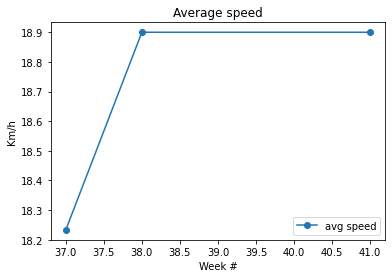

In [34]:
plt.plot(activity_weeks, speed_km_h, marker="o", label = "avg speed")
# plt.ylim([0,52])
plt.xlabel("Week #")
plt.ylabel("Km/h")
plt.title("Average speed")
plt.legend()
plt.show()

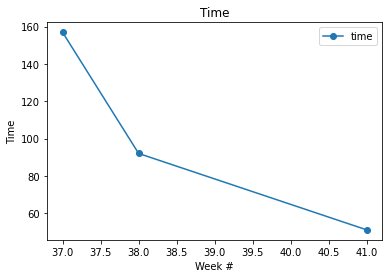

In [35]:
plt.plot(activity_weeks, time, marker="o", label = "time")
# plt.ylim([0,52])
plt.xlabel("Week #")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

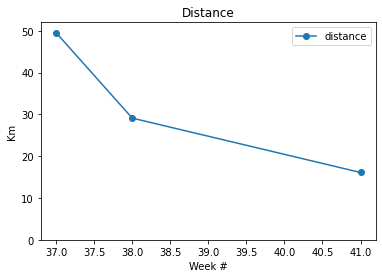

In [36]:
plt.plot(activity_weeks, distance, marker="o", label = "distance")
plt.ylim([0,52])
plt.xlabel("Week #")
plt.ylabel("Km")
plt.title("Distance")
plt.legend()
plt.show()

# Other file

In [37]:
data = pd.read_csv('first_days.txt')
print(data)

        Date
0   12-08-22
1   17-07-22
2   18-06-22
3   21-05-22
4   25-04-22
5   19-03-22
6   17-02-22
7   20-01-22
8   20-12-21
9   21-11-21
10  22-10-21
11  22-09-21


In [38]:
data["Date"][0]

'12-08-22'

In [39]:
other_week_numbers = [week_number(data["Date"][i]) for i in range(len(data))]
other_week_numbers

[37, 41, 45, 49, 52, 58, 62, 66, 70, 74, 79, 83]

# Question: How many cycles are necessary to obtain an accurate prediction for when will your next cycle be?

Suggestion of using several predictive techniques, start with Bayesian prediction.

* de Paula Oliveira, T., Bruinvels, G., Pedlar, C. R., Moore, B., & Newell, J. (2021). Modelling menstrual cycle length in athletes using state-space models. Scientific reports, 11(1), 1-14.
* Bortot, P., Masarotto, G., & Scarpa, B. (2010). Sequential predictions of menstrual cycle lengths. Biostatistics, 11(4), 741-755.

In [41]:
intervals = [other_week_numbers[-1-i]-other_week_numbers[-2-i] for i in range(len(data)-1)]
intervals

[4, 5, 4, 4, 4, 4, 6, 3, 4, 4, 4]

# Ideas
* Crear funciones que obtienen la primera mitad y la segunda mitad, booleano.
* Darle a cada semana un identificador o combinaciones de ellos: 0,1,2,3; tipo sangre, up, down, pitfall
* Crea un objetivo de cantidad de distancia o tiempo para cada semana. Puedes basarte en Col d'Ajusc
* Incluye un objeto llamado ```week``` que tenga velocidad promedio, max y min por viaje por semana

TasK:
* 20 min rest PRE
* 10 min exploration INIT, rec here
### wiped down, 3-4 min
* 20 min rest REST
* 5 min test TEST, rec here

Hipothalamus, read review articles. Sex differences? Learning task simultaneously recording from HC and hipothalamus?

# Notes for microdrive building

* Learn pushpin method, Shay and Josh know
* Build a microdrive in 3D using the 16 tetrodes for ephys board
* Ask Kayla to load .rec files into python. Files in Starred drive folder
* Dropbox-Shay-drive-prototypes-HPC-16 tetrode(only 8?)-V2; re-do (build the same design) that is already here again in Solidworks
* Link slack watch 1st 2 videos about Solidworks
* LEarn how to use .stl for designing something similar to RatHat 2020.